In [4]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('fivethirtyeight')
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['legend.framealpha'] = 1
import numpy as np
import progressbar as pb
import scipy.special as ss

In [5]:
p_vals = np.arange(1,13)
n_vals = np.arange(1,13)
e_vals = np.arange(33)

attack_length = 2
n_lists = list(itertools.product(*[n_vals]*(attack_length-1)))
e_lists = list(itertools.product(*[e_vals]*attack_length))

vectors = list(itertools.product(*[p_vals, n_lists, e_lists]))

min_prob = 1 / float(5.256e7)

In [6]:
def calcDelay(p, n_list, e_list):
    our_delays = [max(24-e, 0) for e in e_list[1:]]
    their_delays = [max(e-8, 0) for e in e_list[1:]]
    return 40 * (p - sum(n_list)) + 8 * sum(our_delays) - 8 * sum(their_delays)

def calcReward(p, e_list):
    n = len(e_list)
    block_reward = 16 * (1/(p+1) + (n-1) * 0.8 + 0.2 * (sum(e_list[1:]) / 32) - (n - 1))
    endorse_reward = 2 * e_list[0] * (1/(p+1) - 1)
    return block_reward + endorse_reward

def calcProb(alpha, p, n_list, e_list):
    n = len(e_list)
    binoms = [ss.binom(32, e) for e in e_list]
    return np.product(binoms) * np.power(alpha, sum(n_list) + sum(e_list) + 1) * np.power(1- alpha,32 * n - sum(e_list))

In [22]:
for alpha in np.arange(0.1, 0.5, 0.05):
    probabilites = []
    values = []
    bar = pb.ProgressBar()
    for p, n_list, e_list in bar(vectors):
        reward = calcReward(p, e_list)
        if (calcDelay(p, n_list, e_list) < 0) and (reward > 0):
            prob = calcProb(alpha, p, n_list, e_list)
            if prob > min_prob:
                probabilites.append(prob)
                values.append(prob * reward)
    print(alpha, sum(probabilites), sum(values), sum(probabilites) * 525600, sum(values) * 525600)

100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  1% (3038 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.1 7.401612955627536e-08 1.728208232411514e-07 0.03890287769477833 0.09083462469554918


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  3% (5582 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.15000000000000002 7.391329569072797e-06 1.3445099132734496e-05 3.8848828215046622 7.0667441041652514


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  1% (2741 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.20000000000000004 6.451212717067762e-05 0.00010009666079021938 33.90757404090815 52.6108049113393


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  3% (5651 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.25000000000000006 0.0002602005199391719 0.0003346803014703642 136.76139328002876 175.90796645282342


100% (156816 of 156816) |################| Elapsed Time: 0:00:06 Time:  0:00:06
  1% (3038 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:10

0.30000000000000004 0.0005891551362721085 0.0006174865090355454 309.6599396246202 324.55090914908266


100% (156816 of 156816) |################| Elapsed Time: 0:00:07 Time:  0:00:07
  1% (1634 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:10

0.3500000000000001 0.0007749830325157187 0.0006871093410721581 407.3310818902617 361.14466966752633


100% (156816 of 156816) |################| Elapsed Time: 0:00:06 Time:  0:00:06
  2% (4526 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:06

0.40000000000000013 0.0006068949984423203 0.0004850515917218337 318.98401118128356 254.9431166089958


100% (156816 of 156816) |################| Elapsed Time: 0:00:05 Time:  0:00:05


0.45000000000000007 0.0002914398375548613 0.00022232523556612522 153.1807786188351 116.85414381355542


In [7]:
def calcRewardReduce(p, e_list):
    n = len(e_list)
    block_reward = 16 * (1/(p+1) + (n-1) * 0.8 + 0.2 * (sum(e_list[1:]) / 32) - (n - 1))
    endorse_reward = 2 * e_list[1] * (1/(p+1) - 1)
    return block_reward + endorse_reward

In [8]:
for alpha in np.arange(0.1, 0.45, 0.05):
    probabilites = []
    values = []
    bar = pb.ProgressBar()
    for p, n_list, e_list in bar(vectors):
        reward = calcRewardReduce(p, e_list)
        if (calcDelay(p, n_list, e_list) < 0) and (reward > 0):
            prob = calcProb(alpha, p, n_list, e_list)
            if prob > min_prob:
                probabilites.append(prob)
                values.append(prob * reward)
    print(alpha, sum(probabilites), sum(values), sum(probabilites) * 525600, sum(values) * 525600)

100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (7408 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.1 7.401612955627536e-08 2.220483886688266e-08 0.03890287769477833 0.011670863308433525


100% (156816 of 156816) |################| Elapsed Time: 0:00:03 Time:  0:00:03
  4% (7438 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.15000000000000002 3.029931170675539e-06 1.8349206350703298e-06 1.5925318233070633 0.9644342857929653


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (7177 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.20000000000000004 1.5046492181600925e-05 8.277291870819353e-06 7.908436290649446 4.350544607302652


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (3609 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.25000000000000006 3.193733220725855e-05 1.5850759589307895e-05 16.786261808135094 8.331159240140229


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  1% (2281 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:06

0.30000000000000004 3.841798722691681e-05 1.7505955519605668e-05 20.192494086467473 9.201130221104739


100% (156816 of 156816) |################| Elapsed Time: 0:00:07 Time:  0:00:07
  3% (5925 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.3500000000000001 2.9591154791683274e-05 1.243698033311027e-05 15.553110958508729 6.5368768630827585


100% (156816 of 156816) |################| Elapsed Time: 0:00:05 Time:  0:00:05


0.40000000000000013 1.5390739551796718e-05 5.9684124152009485e-06 8.089372708424355 3.1369975654296187


In [9]:
def calcDelayFixed(p, n_list, e_list):
    our_delays = [max(24-e, 0) for e in e_list[1:]]
    their_delays = [max(e-8, 0) for e in e_list[1:]]
    return 40 * (p - sum(n_list)) + 16 * sum(our_delays) - 16 * sum(their_delays)

In [10]:
for alpha in np.arange(0.1, 0.45, 0.05):
    probabilites = []
    values = []
    bar = pb.ProgressBar()
    for p, n_list, e_list in bar(vectors):
        reward = calcRewardReduce(p, e_list)
        if (calcDelayFixed(p, n_list, e_list) < 0) and (reward > 0):
            prob = calcProb(alpha, p, n_list, e_list)
            if prob > min_prob:
                probabilites.append(prob)
                values.append(prob * reward)
    print(alpha, sum(probabilites), sum(values), sum(probabilites) * 525600, sum(values) * 525600)

100% (156816 of 156816) |################| Elapsed Time: 0:00:03 Time:  0:00:03
  4% (7634 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:03

0.1 0 0 0 0


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (7453 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.15000000000000002 0 0 0 0


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (7265 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.20000000000000004 0 0 0 0


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (7262 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.25000000000000006 0 0 0 0


100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (6543 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:04

0.30000000000000004 1.0631488716860139e-07 3.189446615058049e-08 0.05587910469581689 0.016763731408745108


100% (156816 of 156816) |################| Elapsed Time: 0:00:07 Time:  0:00:07
  1% (2730 of 156816) |                  | Elapsed Time: 0:00:00 ETA:   0:00:05

0.3500000000000001 2.0901105542368229e-07 6.270331662710484e-08 0.10985621073068741 0.0329568632192063


100% (156816 of 156816) |################| Elapsed Time: 0:00:05 Time:  0:00:05


0.40000000000000013 1.5926234394280343e-07 4.777870318284115e-08 0.08370828797633749 0.02511248639290131


In [17]:
total_prob = 0
for result in results_prob:
    total_prob += results_prob[result]
total_prob, total_prob * 525600

(0.0006068949984423209, 318.98401118128385)

In [18]:
total_value = 0
for result in results_value:
    total_value += results_value[result]
total_value, total_value * 525600

(0.0004850515917218346, 254.94311660899626)

In [15]:
sorted(results_value, key=results_value.__getitem__, reverse=True)

[(1, (1,), (6, 17)),
 (1, (1,), (5, 17)),
 (1, (2,), (5, 14)),
 (1, (2,), (5, 15)),
 (1, (1,), (6, 18)),
 (1, (2,), (5, 16)),
 (1, (1,), (5, 18)),
 (1, (2,), (6, 15)),
 (1, (2,), (6, 16)),
 (1, (2,), (6, 14)),
 (1, (1,), (4, 17)),
 (1, (2,), (4, 14)),
 (1, (2,), (6, 17)),
 (1, (2,), (5, 17)),
 (1, (1,), (6, 19)),
 (1, (2,), (4, 15)),
 (1, (3,), (5, 13)),
 (1, (3,), (5, 14)),
 (1, (3,), (5, 12)),
 (1, (3,), (5, 15)),
 (1, (1,), (5, 19)),
 (1, (2,), (4, 16)),
 (1, (2,), (6, 18)),
 (1, (1,), (4, 18)),
 (1, (3,), (5, 16)),
 (1, (2,), (5, 18)),
 (1, (3,), (6, 15)),
 (1, (3,), (6, 16)),
 (1, (1,), (6, 20)),
 (1, (3,), (4, 13)),
 (1, (3,), (6, 14)),
 (1, (2,), (4, 17)),
 (1, (3,), (4, 14)),
 (1, (3,), (4, 12)),
 (1, (3,), (6, 17)),
 (1, (3,), (5, 17)),
 (1, (2,), (6, 19)),
 (1, (3,), (4, 15)),
 (1, (4,), (5, 13)),
 (1, (4,), (5, 14)),
 (1, (1,), (5, 20)),
 (1, (2,), (3, 14)),
 (1, (1,), (4, 19)),
 (1, (4,), (5, 12)),
 (1, (1,), (3, 17)),
 (1, (4,), (5, 15)),
 (1, (2,), (5, 19)),
 (1, (2,), (3

In [16]:
sorted(results_prob, key=results_prob.__getitem__, reverse=True)

[(1, (2,), (6, 14)),
 (1, (1,), (6, 17)),
 (1, (2,), (6, 15)),
 (1, (2,), (6, 16)),
 (1, (1,), (6, 18)),
 (1, (3,), (6, 13)),
 (1, (3,), (6, 14)),
 (1, (2,), (6, 17)),
 (1, (2,), (5, 14)),
 (1, (3,), (6, 15)),
 (1, (1,), (5, 17)),
 (1, (2,), (5, 15)),
 (1, (1,), (6, 19)),
 (1, (3,), (6, 16)),
 (1, (2,), (6, 18)),
 (1, (2,), (5, 16)),
 (1, (4,), (6, 13)),
 (1, (1,), (5, 18)),
 (1, (4,), (6, 14)),
 (1, (3,), (5, 13)),
 (1, (3,), (5, 12)),
 (1, (3,), (6, 17)),
 (1, (3,), (5, 14)),
 (1, (4,), (6, 15)),
 (1, (2,), (5, 17)),
 (1, (3,), (5, 15)),
 (1, (1,), (6, 20)),
 (1, (2,), (6, 19)),
 (1, (4,), (6, 16)),
 (1, (2,), (4, 14)),
 (1, (1,), (5, 19)),
 (1, (1,), (4, 17)),
 (1, (3,), (6, 18)),
 (1, (3,), (5, 16)),
 (1, (2,), (4, 15)),
 (1, (5,), (6, 13)),
 (1, (2,), (5, 18)),
 (1, (5,), (6, 14)),
 (1, (4,), (5, 13)),
 (1, (4,), (5, 12)),
 (1, (4,), (6, 17)),
 (1, (4,), (5, 14)),
 (1, (5,), (6, 15)),
 (1, (2,), (4, 16)),
 (1, (4,), (5, 11)),
 (1, (3,), (5, 17)),
 (1, (1,), (4, 18)),
 (1, (4,), (5

In [5]:
alpha = 0.4
probabilites = []
rewards = []
bar = pb.ProgressBar()
for p, n_list, e_list in bar(vectors):
    reward = calcReward(p, e_list)
    if (calcDelay(p, n_list, e_list) < 0) and (reward > 0):
        prob = calcProb(alpha, p, n_list, e_list)
        if prob > min_prob:
            probabilites.append(prob)
            rewards.append(reward)

100% (156816 of 156816) |################| Elapsed Time: 0:00:04 Time:  0:00:04


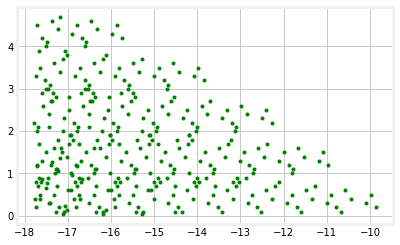

In [9]:
plt.plot(np.log(probabilites), rewards, 'g.')